# Машинное обучение, DS-поток
## Домашнее задание 8

**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ml] Фамилия Имя - задание 8"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `name.N.ipynb` и `name.N.pdf`, где `N` - ваш номер из таблицы с оценками, a `name` - имя ноутбука.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Код из данного задания при проверке может быть запущен.

---

<h1 align=center>
    Welcome в Глубокое обучение!
</h1>

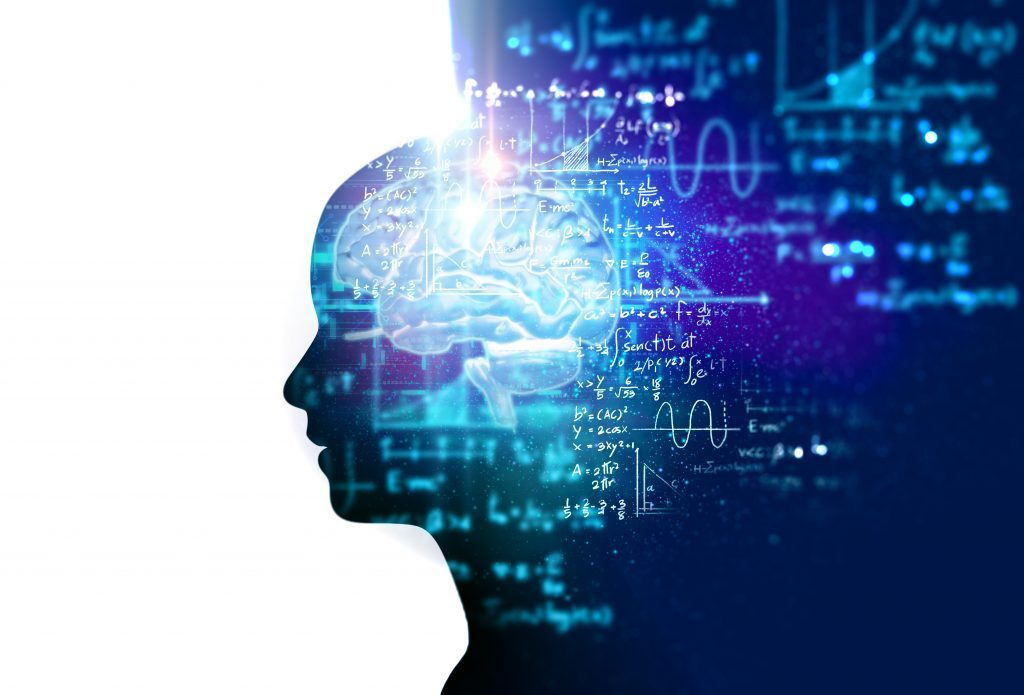

В этом домашнем задании вам предстоит самостоятельно реализовать самые важные компоненты нейросети, **используя только `NumPy`**. 

Структура задания подразумевает выполнение 3-х `jupyter notebook`'ов:

**`[0]task8_train_model.ipynb`**: текущий ноутбук. В нем поясняется суть задания, описаны остальные ноутбуки и именно этот ноутбук нужно запустить, когда все слои уже реализованы;

**`[1]task8_modules.ipynb`**: ноутбук, в котором нужно непосредственно реализовать слои нейронной сети. А именно:

В этом ноутбуке вам предстоит реализовать слои нейронной сети, используя только библиотеку NumPy:

> Базовые концепции:
- [x] `Module`     $-$ абстрактный класс для компонент нейронной сети;
- [ ] *(2 балл)* `Sequential` $-$ класс, содержащий в себе последовательность объектов класса `Module`.

> Слои:
- [ ] *(2 балла)* `Linear`     $-$ линейный слой;
- [ ] *(3 балла)* `SoftMax`    $-$ слой, вычисляющий операцию *softmax*;
- [x] `LogSoftMax` $-$ слой, вычисляющий операцию *log(softmax)*;
- [ ] *(2 балл)*  `Dropout`    $-$ слой дропаута;
- [ ] *(3 балла)* `BatchNormalization` $-$ слой для работы слоя батч-нормализации;
- [x] `Scaling`    $-$ слой для работы слоя батч-нормализации;
- [x] `Flatten`    $-$ слой, который просто "разворачивает" тензор любой размерности в одномерный вектор.

> Функции активации (тоже являются слоями, но выделены в отдельную секцию для удобства):
- [x] `ReLU`      $-$ функция активации *Rectified Linear Unit*;
- [ ] *(1 балл)* `LeakyReLU` $-$ функция активации *Leaky Rectified Linear Unit*;
- [ ] *(1 балл)* `ELU`       $-$ функция активации *Exponential Linear Unit*;
- [ ] *(1 балл)* `Softplus`  $-$ функция активации *Softplus*.

> Функции потерь:
- [x] `Criterion`  $-$ абстрактный класс для функций потерь;
- [ ] *(1 балл)* `MSECriterion`         $-$ среднеквадратичная функция потерь;
- [ ] *(1 балл)* `NLLCriterionUnstable` $-$ negative log-likelihood функция потерь (нестабильная версия, возможны числовые переполнения);
- [x] *(1 балл)* `NLLCriterion` $-$ negative log-likelihood функция потерь (стабильная версия).

> Оптимизаторы:
- [ ] *(2 балла)* `SGD`  $-$ метод стохастического градиентного спуска (включая `momentum`).

**Галочками** помечены те слои, которые **уже реализованы за вас**. Таким образом, задание состоит в реализации оставшихся слоёв (мы заботимся о вашем здоровье 🍀). 

**`[2]task8_test_modules.ipynb`**: ноутбук с юнит-тестами, который следует использовать для отладки ноутбука **`[1]task8_modules.ipynb`**.

**Всего за задание можно получить:**
- **20 баллов** за `[1]task8_modules.ipynb`
- **10 баллов** за `[0]task8_train_model.ipynb` (этот ноутбук)
- Суммарно: **30 баллов**

---

# 1. Использование NumPy-фреймворка (10 баллов = 5 + 5)

Следующая ячейка делает `from [1]task8_modules.ipynb import *`, таким образом позволяя этому ноутбуку видеть все слои:

In [ ]:
%run [1]task8_modules.ipynb

После того, как все слои в `[1]task8_modules.ipynb` протестированы и работают корректно (напомним, что для этого нужно пройти все `assert`'ы в **`[2]task8_test_modules.ipynb`**), проверим нейросеть сначала на наборах синтетических данных, а потом на датасете `FashionMNIST`.

In [ ]:
import time
from time import time, sleep
import warnings

from itertools import cycle, islice

from IPython import display

import numpy as np
import pandas as pd

import scipy.stats as sps

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(font_scale=1.5)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF3300', '#00CC66'])

from sklearn import cluster, datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.optim import SGD as torch_sgd

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

## 1.1. Синтетические данные (5 баллов = 3 + 2)

### Линейно разделимая выборка (3 балла)

Обучим однослойную нейронную сеть решать линейно-разделимую классификацию на 2 класса:

In [ ]:
n_samples = 1024
n_classes = 2

varied_blobs = datasets.make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=n_classes,
    cluster_std=[1.0, 2.5], 
    random_state=RANDOM_SEED
)

sample, labels = varied_blobs

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Линейно разделимая выборка')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.scatter(sample[:,0], sample[:,1], c=labels, cmap=cm_bright, alpha=0.6);

Генератор батчей (помним, что нейросети обучаются итеративно $-$ по батчам):

In [ ]:
def train_generator(sample, labels, batch_size):
    '''
    Генератор батчей. 
    На каждом шаге возвращает `batch_size` объектов из `sample` и их 
    меток из `labels`.
    '''
    
    n_samples = sample.shape[0]
    # Перемешиваем в случайном порядке в начале эпохи
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Обратите внимание на yield вместо return
    # (если раньше не сталкивались с генераторами)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx], labels[batch_idx]

Функция для удобного обучения модели:

In [ ]:
def train_model(
    model, 
    sample, y,
    criterion,
    opt_params, 
    opt_state, 
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из вашего мини-фреймворка. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из вашего мини-фреймворка
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            # Обнуляем градиенты с предыдущей итерации
            # Forward pass
            # Backward pass
            <ВАШ КОД ЗДЕСЬ>
            # Обновление весов
            SGD(model.get_parameters(), 
                model.get_grad_params(), 
                opt_params,
                opt_state)
            loss_history.append(loss)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Функция потерь на train")
        plt.xlabel("итерация")
        plt.ylabel("лосс")
        plt.plot(loss_history, 'b')
        plt.show()
        print('Current loss: %f' % loss)
    
    return model, loss_history

Построим однослойную нейросеть для классификации: размер слоя $2 \times 2$, так как 2 признака и 2 класса. В качестве последнего слоя рекомендуется использовать `LogSoftMax`.

In [ ]:
net = <ВАШ КОД ЗДЕСЬ>

print(net)

Объявим оптимизируемую функцию потерь и гиперпараметры:

In [ ]:
# Функция потерь
criterion = <ВАШ КОД ЗДЕСЬ>

# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate': 1e-2, 'momentum': 0.9}
optimizer_state = {}

# Гиперпараметры цикла обучения и генератора
n_epoch = 30
batch_size = 128

Проверим, что кодирование производится верно:

In [ ]:
y = np.hstack([1-labels[:,None], labels[:,None]])
print(y.shape)
print(labels[:10])
print(y[:10])

Обучим модель с помощью функции `train_model`:

In [ ]:
net, loss_history = train_model(
    net, 
    sample, y, 
    criterion,
    optimizer_config, 
    optimizer_state,
    n_epoch,
    batch_size
)

**Упражнение:** Попробуйте поменять гиперпараметр `learning_rate` в `optimizer_config` на 1е-1, 1е-2, 1е-3 и 1е-4. Как это влияет на обучение?

Батч-генератор для тестовой выборки:

In [ ]:
def generate_grid(sample, h=0.02):
    ''' Генерирует двумерную сетку. '''
    
    x_min, x_max = sample[:, 0].min() - .5, sample[:, 0].max() + .5
    y_min, y_max = sample[:, 1].min() - .5, sample[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    return xx, yy


def test_generator(sample):
    ''' Батч-генератор для тестовых данных (без меток). '''
    
    n_samples = sample.shape[0]
    indices = np.arange(n_samples)
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield sample[batch_idx]

Функции для удобного тестирования модели:

In [ ]:
def test_model(model, test_sample):
    ''' Тестирует модель на тестовой выборке. '''
    
    preds = []
    model.evaluate()
    for test_batch in test_generator(test_sample):
        batch = model.forward(test_batch)
        batch = batch.argmax(axis=1).reshape(-1,1)
        preds.append(batch)
    preds = np.vstack(preds)
    return preds

In [ ]:
def plot_grid_preds(sample, labels, xx, yy, preds, title):
    ''' Функция для удобной отрисовки предсказаний 
    нейросети на двумерной сетке. '''
    
    plt.figure(figsize=(12,7))
    plt.title(title)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.scatter(sample[:,0], sample[:,1], c=labels, 
                cmap=cm_bright, alpha=0.55)
    plt.contourf(xx, yy, preds, alpha=.2, cmap=cm)
    plt.show();

Выведем предсказания модели на двумерной сетке:

In [ ]:
xx, yy = <ВАШ КОД ЗДЕСЬ>
test_sample = <ВАШ КОД ЗДЕСЬ>

test_predictions = <ВАШ КОД ЗДЕСЬ>
test_predictions = <ВАШ КОД ЗДЕСЬ>

plot_grid_preds(sample, labels, xx, yy, 
                test_predictions, 'Линейно разделимая выборка')

Сравним с точно такой же моделью, но на PyTorch:

*Подсказка:* названия слоев идентичны, если брать их из `torch.nn`. Отличия только в оптимизаторе и названии функции потерь.

In [ ]:
net_torch = <ВАШ КОД ЗДЕСЬ>

print(net_torch)

In [ ]:
def train_model_torch(
    model, 
    sample, y,
    criterion,
    optimizer,
    n_epoch, 
    batch_size
):
    '''
    Обучает модель из PyTorch. 
    Возвращает обученную модель, историю значений функции потерь 
    и метрики качества.
    
    :param `model`: модель из PyTorch
    :param `sample`: матрица объектов
    :param `y`: вектор истинных меток объектов
    :param `criterion`: функция потерь
    :param `opt_params`: гиперпараметры оптимизатора
    :param `opt_state`: текущая информация о градиентах, 
                        хранящаяся в оптимизаторе
    :param `n_epoch`: количество эпох
    :param `batch_size`: размер одного батча
    '''
    
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in train_generator(sample, y, batch_size):
            # Обнуляем градиенты с предыдущей итерации
            # Forward pass
            # Backward pass
            # Обновление весов
            <ВАШ КОД ЗДЕСЬ>
            
            loss_history.append(loss.data)

        display.clear_output(wait=True)
        
        plt.figure(figsize=(8, 6))
        plt.title("Функция потерь на train")
        plt.xlabel("итерация")
        plt.ylabel("лосс")
        plt.plot(loss_history, 'b')
        plt.show()
        print('Current loss: %f' % loss)
    
    return model, loss_history

In [ ]:
criterion = <ВАШ КОД ЗДЕСЬ>
optimizer = torch_sgd(<ВАШ КОД ЗДЕСЬ>)

net_torch, loss_history = train_model_torch(
    net_torch, sample, y, 
    criterion,
    optimizer,
    n_epoch,
    batch_size
)

**Для самопроверки:** Значение функции потерь (лосса) должны быть прмиерно одинаковые у вашей модели и у сети из PyTorch. Каким именно на этом датасете $-$ см таблицу ниже.

|  Архитектура  | learning_rate | Значение лосса |
|-------------|---------------|-------------|
| Linear(2,2) |  1e-2         | 0.1 и ниже |

In [ ]:
def test_torch(model, test_sample):
    '''
    Тестирует модель из PyTorch на тестовой выборке.
    '''
    
    preds = []
    model.eval()
    with torch.no_grad():
        for test_batch in test_generator(test_sample):
            <ВАШ КОД ЗДЕСЬ>
    <ВАШ КОД ЗДЕСЬ>
    return preds

In [ ]:
xx, yy = <ВАШ КОД ЗДЕСЬ>
test_sample = <ВАШ КОД ЗДЕСЬ>

test_predictions = <ВАШ КОД ЗДЕСЬ>
test_predictions = <ВАШ КОД ЗДЕСЬ>
   
plot_grid_preds(
    sample, 
    labels, 
    xx, yy, 
    test_predictions, 
    'Линейно разделимая выборка'
)

Рисунки с предсказаниями должны практически совпадать у вашей модели и у модели на PyTorch.

### Вложенные окружности (2 балла)

Проверим работу нейросети на более сложной выборке, которая линейно не разделима в исходном пространстве признаков:

In [ ]:
n_samples = 1024

noisy_circles = datasets.make_circles(
    n_samples=n_samples, 
    factor=.5, 
    noise=.05
)

sample, labels = noisy_circles

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Вложенные окружности')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.scatter(sample[:,0], sample[:,1], c=labels, 
            cmap=cm_bright, alpha=0.55);

Сначала попробуем обучить и протестировать однослойную неросеть:

Архитектура и гиперпараметры:

In [ ]:
net = <ВАШ КОД ЗДЕСЬ>
print(net)

# Функция потерь
criterion = <ВАШ КОД ЗДЕСЬ>

# Гиперпараметры оптимизатора
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}

# Гиперпараметры цикла обучения и генератора
n_epoch = 30
batch_size = 128

In [ ]:
y = np.hstack([1-labels[:,None], labels[:,None]])
print(y.shape)
print(labels[:10])
print(y[:10])

Обучение модели:

In [ ]:
net, loss_history = <ВАШ КОД ЗДЕСЬ>

Предсказание на двумерной сетке:

In [ ]:
<ВАШ КОД ЗДЕСЬ>

plot_grid_preds(sample, labels, xx, yy, 
                test_predictions, 'Вложенные окружности')

Вряд ли у вас получился лосс ниже 0.68 и адекватный рисунок. Это говорит о том, что один слой не может решить задачу (что логично).

Попробуем сделать **двухслойную** нейросеть. Не жалейте нейронов в скрытый слой:

*Подсказка:* не забудьте про нелинейности.

Архитектура и гиперпараметры:

In [ ]:
net = <ВАШ КОД ЗДЕСЬ>
print(net)

criterion = <ВАШ КОД ЗДЕСЬ>

optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}

n_epoch = 30
batch_size = 128

y = np.hstack([1-labels[:,None], labels[:,None]])
print(y.shape)

Обучение модели:

In [ ]:
net, loss_history = <ВАШ КОД ЗДЕСЬ>

Тестирование модели:

In [ ]:
<ВАШ КОД ЗДЕСЬ>

plot_grid_preds(sample, labels, xx, yy, 
                test_predictions, 'Вложенные окружности')

**Упражнение:** Попробуйте менять количество нейронов в скрытом слое. Начиная с какого количества нейронов окружности начинают хорошо разделяться?

И снова сравним с PyTorch:

In [ ]:
net_torch = <ВАШ КОД ЗДЕСЬ>

print(net_torch)

criterion = <ВАШ КОД ЗДЕСЬ>
optimizer = torch_sgd(<ВАШ КОД ЗДЕСЬ>)

net_torch, loss_history = <ВАШ КОД ЗДЕСЬ>

In [ ]:
<ВАШ КОД ЗДЕСЬ>

plot_grid_preds(sample, labels, xx, yy, 
                test_predictions, 'Вложенные окружности')

**Для самопроверки:** Значение функции потерь (лосса) должны быть примерно одинаковые у вашей модели и у сети из PyTorch. Каким именно на этом датасете $-$ см. таблицу ниже.

|  Архитектура  | learning_rate | Значение лосса |
|-------------|---------------|-------------|
| (2,100) -> ReLU -> (100,2) |  1e-2         | 0.2 и ниже |

Оба рисунка должны примерно совпадать и адекватно разделять окружности между собой (одна область должна быть "внутри" другой).

**Выводы:** ...

## 1.2. Многоклассовая классификация: FashionMNIST (5 баллов = 2 + 2 + 1)

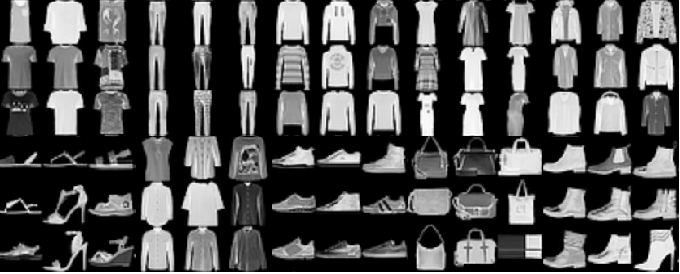

FashionMNIST $-$ это датасет, аналогичный MNIST'у (датасету рукописных цифр), но по своей сути чуть интереснее $-$ вместо цифр здесь элементы одежды. Это, конечно, не [DeepFashion](https://github.com/switchablenorms/DeepFashion2), но для проверки работы слоев подойдет.

Вместе с заданием идет архив `fashionmnist.zip`, распакуйте его в папку с этим ноутбуком (архив изначально скачан с [Kaggle Datasets](https://www.kaggle.com/zalando-research/fashionmnist)).

In [2]:
# !unzip fashionmnist.zip

В данном случае уже есть `.csv`-файлы, содержашие в себе "развернутые" в вектор-строку картинки (признаки) и столбец `label` (метки). Каждая картинка имеет размер $28 \times 28$. Значения (интенсивности цвета) в каждом пикселе $-$ целые числа от 0 до 255. 

Значения меток классов:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [ ]:
train_df = pd.read_csv('fashion-mnist_train.csv')
train_df

In [ ]:
test_df = pd.read_csv('fashion-mnist_test.csv')
test_df

В трейне 60к картинок, в тесте 10к. В глубоком обучении и нейросетях в целом обычно не делают кросс-валидацию, потому что это долго и, следовательно, вычислительно затратно. Обычно выделяют `train`, `val` и `test` сеты: на `train` обучают, на `val` валидируют модели на предмет переобучения и подбирают гиперпараметры, на `test` измеряют итоговое качество. 

Убедимся, что данные уже перемешаны:

In [ ]:
train_df['label'].values[:10]

In [ ]:
test_df['label'].values[:10]

Как видим, данные уже перемешаны, так что просто выделим под валидацию 1/5 часть трейна:

In [ ]:
val_start_idx = -int(len(train_df)/5)

train_df = train_df[:val_start_idx]
val_df = train_df[val_start_idx:]

print(train_df.shape, val_df.shape)

Разделим признаки и метки:

In [ ]:
train_sample = train_df.drop(axis=1, labels=['label']).values
train_labels = train_df['label'].values
val_sample = val_df.drop(axis=1, labels=['label']).values
val_labels = val_df['label'].values
test_sample = test_df.drop(axis=1, labels=['label']).values
test_labels = test_df['label'].values

print('Train:', train_sample.shape, train_labels.shape)
print('Val:', val_sample.shape, val_labels.shape)
print('Test:', test_sample.shape, test_labels.shape)

Сразу преобразуем метки в OneHot:

In [ ]:
def make_onehot(labels):
    '''
    Практикуемся делать OneHot-кодирование на PyTorch
    '''
    
    num_classes = len(np.unique(labels))
    y = torch.LongTensor(labels.astype('int')).view(-1, 1)
    y_ohe = torch.FloatTensor(y.shape[0], num_classes)
    y_ohe.zero_()
    y_ohe.scatter_(1, y, 1)
    return y_ohe

In [ ]:
y_train_ohe = make_onehot(train_labels).numpy()
y_val_ohe = make_onehot(val_labels).numpy()
y_test_ohe = make_onehot(test_labels).numpy()

print(train_labels.shape, y_train_ohe.shape)
print(train_labels[:10])
print(y_train_ohe[:10])

Поскольку мы получили `np.array`'и, то можем использовать уже написанные функции `train_model` и `test_model`. Осталось только объявить архитектуру нейросети, оптимизатор и функцию потерь.

### Задание (2 балла)

Добейтесь точности не менее 0.85 на тестовой выборке. Используйте уже реализованные для синтетических данных функции `train_model` и `test_model`. Попробуйте добавить в архитектуру:
- `Dropout`
- `BatchNorm`
- `LeakyReLU`, `ELU`, `SoftPlus`
- Попробуйте разные связки выходного слоя и лосса: `LogSoftmax->NLLCriterion` и `Softmax->NLLCriterionUnstable`

Архитекутра модели и гиперпараметры:

In [ ]:
num_features = train_sample.shape[1]
num_classes = y_train_ohe.shape[1]

net = <ВАШ КОД ЗДЕСЬ>
print(net)

criterion = <ВАШ КОД ЗДЕСЬ>

optimizer_config = {'learning_rate' : 1e-4, 'momentum': 0.9}
optimizer_state = {}

n_epoch = 10
batch_size = 128

Обучение модели:

In [ ]:
net, loss_history = <ВАШ КОД ЗДЕСЬ>

Предскажем на валидационной и тестовой выборке:

In [ ]:
val_predictions_my = <ВАШ КОД ЗДЕСЬ>
print(val_predictions_my.shape)
test_predictions_my = <ВАШ КОД ЗДЕСЬ>
print(test_predictions_my.shape)

In [ ]:
print(
    f'Качество на Val моей собственной нейронной сети, \
    обученной в течение {n_epoch} эпох: \
    {accuracy_score(val_labels, val_predictions_my):.3}'
)

In [ ]:
print(
    f'Качество на Test моей собственной нейронной сети, \
    обученной в течение {n_epoch} эпох: \
    {accuracy_score(test_labels, test_predictions_my):.3}'
)

Сравним с качеством аналогичной нейросети на PyTorch. Сначала обучим аналогичную torch-модель:

In [ ]:
net_torch = <ВАШ КОД ЗДЕСЬ>
print(net_torch)

criterion = <ВАШ КОД ЗДЕСЬ>
optimizer = torch_sgd(
    <ВАШ КОД ЗДЕСЬ>
)

net_torch, loss_history = <ВАШ КОД ЗДЕСЬ>

Сделаем предсказания и посчитаем метрику качества:

In [ ]:
val_predictions_torch = <ВАШ КОД ЗДЕСЬ>
print(val_predictions_torch.shape)
test_predictions_torch = <ВАШ КОД ЗДЕСЬ>
print(test_predictions_torch.shape)

In [ ]:
print(
    f'Качество на Val нейронной сети из PyTorch, \
    в течение {n_epoch} эпох: \
    {accuracy_score(val_labels, val_predictions_torch):.3}'
)

In [ ]:
print(
    f'Качество на Test нейронной сети из PyTorch, \
    обученной в течение {n_epoch} эпох: \
    {accuracy_score(test_labels, test_predictions_torch):.3}'
)

**Для самопроверки:** Значение функции потерь (лосса) должны быть примерно одинаковые у вашей модели и у сети из PyTorch. Каким именно на этом датасете $-$ см. таблицу ниже.

|  Архитектура  | learning_rate | Значение лосса |
|-------------|---------------|-------------|
| (784,128)->ReLU->(128,128)->ReLU->(128,10) |  1e-4  | 0.5 и ниже |

Accuracy должно примерно совпадать и быть больше 0.85.

**Упражнение:** Сейчас мы подавали в нейросеть "сырые" значения в пикселях. В компьютерном зрении обычно их масштабируют (нормализуют), чтобы значения во входном тензоре были от 0 до 1. Попробуйте поделить обучающую выборку на максимальное значение интенсивности пикселя и обучить сети (не забудьте отмасштабировать значения в тестовых тензорах тоже). Улучшилось/ухудшилось итогвое качество нейросетей? Как вы думаете, почему?

Также, как и всегда ранее, полезно поиграться со значениями гиперпараметров (количество нейронов в скрытом слое, `learning_rate`, `momentum`).

### Задание (2 балла)

Является ли разница в качестве вашей нейросети и сети на PyTorch статистически значимой? Проверьте, написав код/формулы в ячейках ниже.

In [ ]:
<ВАШ КОД ЗДЕСЬ>

In [ ]:
...

**Вывод**: ...

### Задание (1 балл)

Выберите случайные 5 картинок и предскажите для них вероятности. Нарисуйте для каждой картинки в строчку:
1. Саму картинку
2. Гистограмму оценок вероятностей, которые получаются на выходе

*Примечание:* Удобно вывести по оси X названия классов вместо чисел. Соответствие классов номерам дано в ячейке ниже. 

In [ ]:
id_to_name = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def plot_image_hist(pixel_vector, probas, true_label=None, figsize=(20,4)):
    <ВАШ КОД ЗДЕСЬ>

In [ ]:
<ВАШ КОД ЗДЕСЬ>

## 2. Послесловие

Возможно, вам кажется, что вы построили какую-то игрушечную нейросеть, которая неспособна работать в "реальных" задачах. **Это не так.**

То, что вы реализовали, по сути составляет основную часть фреймворка PyTorch. Да, там реализовано еще много трюков для более эффективных вычислений, `autograd` и работа с GPU, но суть та же $-$ модули, где каждый предоставляет forward и backward (с помощь `autograd`).

В этом задании вы оперировали в основном полносвязными (`Linear`) слоями, чаще их называют Fully-Connected (FC). Они активно применяются и по сей день:
- В задачах компьютерного зрения (CV): как слои классификации в "голове" сверточных нейросетей 
- В задачах обработки естественного языка (NLP): как слои attention'а в Transformer'е
- В Reinforcement Learning (RL) иногда делают архитектуры исключительно из FC-слоев

## 3. Полезные ссылки

При составлении этого Домашнего задания авторы вдохновлялись [заданием](https://github.com/yandexdataschool/Practical_DL/tree/spring2019/homework01) из курса "Deep Learning" Школы Анализа Данных.

- [Заметки главы ИИ в Tesla Andrej Karpathy по обучению нейросетей](http://karpathy.github.io/2019/04/25/recipe/)
- [Backpropagation на brilliant.org](https://brilliant.org/wiki/backpropagation/)
- См. ссылки в `[1]task8_modules.ipynb`